In [2]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

In [ ]:
df_use=pd.read_csv('flights.csv')
df=df_use.sample(n=300000).copy()
del df_use

In [4]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
284021,2015,1,19,1,OO,7416,N449SW,RHI,MSP,1547,...,1708.0,21.0,0,0,NaN,21.0,0.0,0.0,0.0,0.0
1179949,2015,3,18,3,WN,215,N392SW,OAK,SAN,1030,...,1206.0,11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5644237,2015,12,20,7,DL,425,N718TW,JFK,ATL,1535,...,1801.0,-20.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1062072,2015,3,11,3,VX,710,N852VA,SFO,DAL,720,...,1236.0,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4645319,2015,10,17,6,WN,3080,N708SW,13495,10397,1045,...,1255.0,-20.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.groupby('DEPARTURE_DELAY').size()

DEPARTURE_DELAY
-41.0      1
-40.0      2
-38.0      1
-37.0      1
-36.0      1
          ..
 1165.0    1
 1184.0    1
 1190.0    1
 1362.0    1
 1429.0    1
Length: 600, dtype: int64

df['OUTPUT_LABEL']=(df.DEPARTURE_DELAY>=15).astype(int)

In [6]:
df['OUTPUT_LABEL']=(df.DEPARTURE_DELAY>0).astype(int)

In [7]:
def cal_prevalence(y_actual):
    return(sum(y_actual)/len(y_actual))

In [8]:
print('Prevalence:%.3f'%cal_prevalence(df['OUTPUT_LABEL'].values))

Prevalence:0.365


In [9]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,OUTPUT_LABEL
284021,2015,1,19,1,OO,7416,N449SW,RHI,MSP,1547,...,21.0,0,0,NaN,21.0,0.0,0.0,0.0,0.0,0
1179949,2015,3,18,3,WN,215,N392SW,OAK,SAN,1030,...,11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1
5644237,2015,12,20,7,DL,425,N718TW,JFK,ATL,1535,...,-20.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
1062072,2015,3,11,3,VX,710,N852VA,SFO,DAL,720,...,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
4645319,2015,10,17,6,WN,3080,N708SW,13495,10397,1045,...,-20.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0


In [10]:
df_airports=pd.read_csv('airports.csv')
df_airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [11]:
df.loc[~df.ORIGIN_AIRPORT.isin(df_airports.IATA_CODE.values),'ORIGIN_AIRPORT']='OTHERS'
df.loc[~df.DESTINATION_AIRPORT.isin(df_airports.IATA_CODE.values),'DESTINATION_AIRPORT']='OTHERS'

In [12]:
df.drop(columns=['TAXI_OUT', 'TAXI_IN', 'WHEELS_ON', 'WHEELS_OFF', 'YEAR',  'AIR_SYSTEM_DELAY',
                       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
                       'WEATHER_DELAY', 'DIVERTED', 'CANCELLATION_REASON',
                       'FLIGHT_NUMBER', 'TAIL_NUMBER', 'AIR_TIME'])

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLED,OUTPUT_LABEL
284021,1,19,1,OO,RHI,MSP,1547,1540.0,-7.0,60.0,88.0,190,1647,1708.0,21.0,0,0
1179949,3,18,3,WN,OAK,SAN,1030,1037.0,7.0,85.0,89.0,446,1155,1206.0,11.0,0,1
5644237,12,20,7,DL,JFK,ATL,1535,1532.0,-3.0,166.0,149.0,760,1821,1801.0,-20.0,0,0
1062072,3,11,3,VX,SFO,DAL,720,720.0,0.0,195.0,196.0,1476,1235,1236.0,1.0,0,0
4645319,10,17,6,WN,OTHERS,OTHERS,1045,1042.0,-3.0,90.0,73.0,425,1315,1255.0,-20.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540845,2,5,4,F9,SLC,DEN,1610,1615.0,5.0,78.0,73.0,391,1728,1728.0,0.0,0,1
1754363,4,22,3,OO,SLC,SMF,1707,1701.0,-6.0,108.0,106.0,532,1755,1747.0,-8.0,0,0
1907238,5,2,6,MQ,ELP,ORD,715,721.0,6.0,184.0,163.0,1236,1119,1104.0,-15.0,0,1
4609849,10,15,4,WN,OTHERS,OTHERS,735,759.0,24.0,75.0,68.0,289,850,907.0,17.0,0,1


In [13]:
df['AIRLINE'].replace(['UA','AA','US','F9','B6','OO','AS','NK','WN','DL','EV','HA','MQ','VX'],[0,1,2,3,4,5,6,7,8,9,10,11,12,13],inplace=True)
     

In [14]:
df['ORIGIN_AIRPORT'].replace(['ABE','ABI','ABQ','ABR','ABY','ACK','ACT','ACV','ACY','ADK','ADQ','AEX','AGS','AKN','ALB','ALO','AMA','ANC','APN','ASE','ATL','ATW','AUS','AVL','AVP','AZO','BDL','BET','BFL','BGM','BGR','BHM','BIL','BIS','BJI','BLI','BMI','BNA','BOI','BOS','BPT','BQK','BQN','BRD','BRO','BRW','BTM','BTR','BTV','BUF','BUR','BWI','BZN','CAE','CAK','CDC','CDV','CEC','CHA','CHO','CHS','CID','CIU','CLD','CLE','CLL','CLT','CMH','CMI','CMX','CNY','COD','COS','COU','CPR','CRP','CRW','CSG','CVG','CWA','DAB','DAL','DAY','DBQ','DCA','DEN','DFW','DHN','DIK','DLG','DLH','DRO','DSM','DTW','DVL','EAU','ECP','EGE','EKO','ELM','ELP','ERI','ESC','EUG','EVV','EWN','EWR','EYW','FAI','FAR','FAT','FAY','FCA','FLG','FLL','FNT','FSD','FSM','FWA','GCC','GCK','GEG','GFK','GGG','GJT','GNV','GPT','GRB','GRI','GRK','GRR','GSO','GSP','GST','GTF','GTR','GUC','GUM','HDN','HIB','HLN','HNL','HOB','HOU','HPN','HRL','HSV','HYA','HYS','IAD','IAG','IAH','ICT','IDA','ILG','ILM','IMT','IND','INL','ISN','ISP','ITH','ITO','JAC','JAN','JAX','JFK','JLN','JMS','JNU','KOA','KTN','LAN','LAR','LAS','LAW','LAX','LBB','LBE','LCH','LEX','LFT','LGA','LGB','LIH','LIT','LNK','LRD','LSE','LWS','MAF','MBS','MCI','MCO','MDT','MDW','MEI','MEM','MFE','MFR','MGM','MHK','MHT','MIA','MKE','MKG','MLB','MLI','MLU','MMH','MOB','MOT','MQT','MRY','MSN','MSO','MSP','MSY','MTJ','MVY','MYR','OAJ','OAK','OGG','OKC','OMA','OME','ONT','ORD','ORF','ORH','OTH','OTZ','PAH','PBG','PBI','PDX','PHF','PHL','PHX','PIA','PIB','PIH','PIT','PLN','PNS','PPG','PSC','PSE','PSG','PSP','PUB','PVD','PWM','RAP','RDD','RDM','RDU','RHI','RIC','RKS','RNO','ROA','ROC','ROW','RST','RSW','SAF','SAN','SAT','SAV','SBA','SBN','SBP','SCC','SCE','SDF','SEA','SFO','SGF','SGU','SHV','SIT','SJC','SJT','SJU','SLC','SMF','SMX','SNA','SPI','SPS','SRQ','STC','STL','STT','STX','SUN','SUX','SWF','SYR','TLH','TOL','TPA','TRI','TTN','TUL','TUS','TVC','TWF','TXK','TYR','TYS','UST','VEL','VLD','VPS','WRG','WYS','XNA','YAK','YUM','OTHERS'],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322],inplace=True)

In [15]:
df['DESTINATION_AIRPORT'].replace(['ABE','ABI','ABQ','ABR','ABY','ACK','ACT','ACV','ACY','ADK','ADQ','AEX','AGS','AKN','ALB','ALO','AMA','ANC','APN','ASE','ATL','ATW','AUS','AVL','AVP','AZO','BDL','BET','BFL','BGM','BGR','BHM','BIL','BIS','BJI','BLI','BMI','BNA','BOI','BOS','BPT','BQK','BQN','BRD','BRO','BRW','BTM','BTR','BTV','BUF','BUR','BWI','BZN','CAE','CAK','CDC','CDV','CEC','CHA','CHO','CHS','CID','CIU','CLD','CLE','CLL','CLT','CMH','CMI','CMX','CNY','COD','COS','COU','CPR','CRP','CRW','CSG','CVG','CWA','DAB','DAL','DAY','DBQ','DCA','DEN','DFW','DHN','DIK','DLG','DLH','DRO','DSM','DTW','DVL','EAU','ECP','EGE','EKO','ELM','ELP','ERI','ESC','EUG','EVV','EWN','EWR','EYW','FAI','FAR','FAT','FAY','FCA','FLG','FLL','FNT','FSD','FSM','FWA','GCC','GCK','GEG','GFK','GGG','GJT','GNV','GPT','GRB','GRI','GRK','GRR','GSO','GSP','GST','GTF','GTR','GUC','GUM','HDN','HIB','HLN','HNL','HOB','HOU','HPN','HRL','HSV','HYA','HYS','IAD','IAG','IAH','ICT','IDA','ILG','ILM','IMT','IND','INL','ISN','ISP','ITH','ITO','JAC','JAN','JAX','JFK','JLN','JMS','JNU','KOA','KTN','LAN','LAR','LAS','LAW','LAX','LBB','LBE','LCH','LEX','LFT','LGA','LGB','LIH','LIT','LNK','LRD','LSE','LWS','MAF','MBS','MCI','MCO','MDT','MDW','MEI','MEM','MFE','MFR','MGM','MHK','MHT','MIA','MKE','MKG','MLB','MLI','MLU','MMH','MOB','MOT','MQT','MRY','MSN','MSO','MSP','MSY','MTJ','MVY','MYR','OAJ','OAK','OGG','OKC','OMA','OME','ONT','ORD','ORF','ORH','OTH','OTZ','PAH','PBG','PBI','PDX','PHF','PHL','PHX','PIA','PIB','PIH','PIT','PLN','PNS','PPG','PSC','PSE','PSG','PSP','PUB','PVD','PWM','RAP','RDD','RDM','RDU','RHI','RIC','RKS','RNO','ROA','ROC','ROW','RST','RSW','SAF','SAN','SAT','SAV','SBA','SBN','SBP','SCC','SCE','SDF','SEA','SFO','SGF','SGU','SHV','SIT','SJC','SJT','SJU','SLC','SMF','SMX','SNA','SPI','SPS','SRQ','STC','STL','STT','STX','SUN','SUX','SWF','SYR','TLH','TOL','TPA','TRI','TTN','TUL','TUS','TVC','TWF','TXK','TYR','TYS','UST','VEL','VLD','VPS','WRG','WYS','XNA','YAK','YUM','OTHERS'],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322],inplace=True)

In [16]:
col_num=['SCHEDULED_DEPARTURE','SCHEDULED_TIME','FLIGHT_NUMBER','MONTH','DAY_OF_WEEK','AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT']
col_num

['SCHEDULED_DEPARTURE',
 'SCHEDULED_TIME',
 'FLIGHT_NUMBER',
 'MONTH',
 'DAY_OF_WEEK',
 'AIRLINE',
 'ORIGIN_AIRPORT',
 'DESTINATION_AIRPORT']

df=pd.concat([df,df_cat],axis=1)

col_all_cat=list(df_cat.columns)

In [17]:
col_input=col_num
df_data=df[col_input+['OUTPUT_LABEL']]
df_data.head()

,SCHEDULED_DEPARTURE,SCHEDULED_TIME,FLIGHT_NUMBER,MONTH,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,OUTPUT_LABEL
284021,1547,60.0,7416,1,1,5,258,216,0
1179949,1030,85.0,215,3,3,8,222,268,1
5644237,1535,166.0,425,12,7,9,166,20,0
1062072,720,195.0,710,3,3,13,278,81,0
4645319,1045,90.0,3080,10,6,8,322,322,0


In [24]:
j=0
for i in df_airports['IATA_CODE']:
    print(i,' ',j)
    j+=1

ABE   0
ABI   1
ABQ   2
ABR   3
ABY   4
ACK   5
ACT   6
ACV   7
ACY   8
ADK   9
ADQ   10
AEX   11
AGS   12
AKN   13
ALB   14
ALO   15
AMA   16
ANC   17
APN   18
ASE   19
ATL   20
ATW   21
AUS   22
AVL   23
AVP   24
AZO   25
BDL   26
BET   27
BFL   28
BGM   29
BGR   30
BHM   31
BIL   32
BIS   33
BJI   34
BLI   35
BMI   36
BNA   37
BOI   38
BOS   39
BPT   40
BQK   41
BQN   42
BRD   43
BRO   44
BRW   45
BTM   46
BTR   47
BTV   48
BUF   49
BUR   50
BWI   51
BZN   52
CAE   53
CAK   54
CDC   55
CDV   56
CEC   57
CHA   58
CHO   59
CHS   60
CID   61
CIU   62
CLD   63
CLE   64
CLL   65
CLT   66
CMH   67
CMI   68
CMX   69
CNY   70
COD   71
COS   72
COU   73
CPR   74
CRP   75
CRW   76
CSG   77
CVG   78
CWA   79
DAB   80
DAL   81
DAY   82
DBQ   83
DCA   84
DEN   85
DFW   86
DHN   87
DIK   88
DLG   89
DLH   90
DRO   91
DSM   92
DTW   93
DVL   94
EAU   95
ECP   96
EGE   97
EKO   98
ELM   99
ELP   100
ERI   101
ESC   102
EUG   103
EVV   104
EWN   105
EWR   106
EYW   107
FAI   108
FAR   109
FAT   110


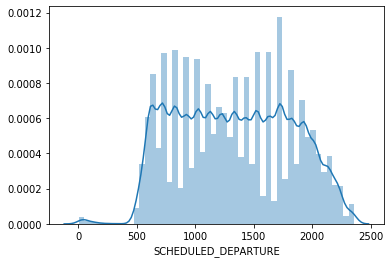

In [18]:
import seaborn as sns
sns.distplot(df_data['SCHEDULED_DEPARTURE'])

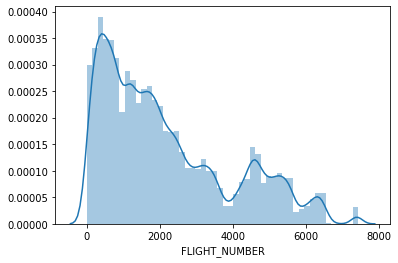

In [19]:
sns.distplot(df_data['FLIGHT_NUMBER'])

In [20]:
df_data=df_data.sample(n=len(df_data))
df_data=df_data.reset_index(drop=True)

In [21]:
df_valid_test=df_data.sample(frac=0.30)
df_test=df_valid_test.sample(frac=0.5)
df_valid=df_valid_test.drop(df_test.index)

In [22]:
df_train_all=df_data.drop(df_valid.index)

In [23]:
rowpos=(df_train_all.OUTPUT_LABEL==1)
df_train_pos=df_train_all.loc[rowpos]
df_train_neg=df_train_all.loc[~rowpos]
df_train=pd.concat([df_train_pos,df_train_neg.sample(n=len(df_train_pos))],axis=0)
df_train=df_train.sample(n=len(df_train)).reset_index(drop=True)
print('Train balanced prevalence n= %d:%.3f'%(len(df_train),cal_prevalence(df_train.OUTPUT_LABEL.values)))

Train balanced prevalence n= 186406:0.500


In [24]:
x_train=df_train[col_input].values
x_train_all=df_train_all[col_input].values
x_valid=df_valid[col_input].values
y_train=df_train['OUTPUT_LABEL'].values
y_valid=df_valid['OUTPUT_LABEL'].values
print('Training All shapes :',x_train.shape)
print('Training shapes :',x_train.shape,y_train.shape)
print('Validation shapes :',x_valid.shape,y_valid.shape)

Training All shapes : (186406, 8)
Training shapes : (186406, 8) (186406,)
Validation shapes : (45000, 8) (45000,)


In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train_all)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [26]:
import pickle
scalerfile='scaler.sav'
pickle.dump(scaler,open(scalerfile,'wb'))

In [27]:
scaler=pickle.load(open(scalerfile,'rb'))

In [28]:
x_train_tf=scaler.transform(x_train)
x_valid_tf=scaler.transform(x_valid)

In [29]:
from sklearn.metrics import roc_auc_score,accuracy_score,precision_score,recall_score
def cal_specificity(y_actual,y_pred,thresh):
    return sum((y_pred<thresh)&(y_actual==0))/sum(y_actual==0)
def print_report(y_actual,y_pred,thresh):
    auc=roc_auc_score(y_actual,y_pred)
    accuracy=accuracy_score(y_actual,(y_pred>thresh))
    precision=precision_score(y_actual,(y_pred>thresh))
    #specify=specify_score(y_actual,(y_pred>thresh))
    recall=recall_score(y_actual,y_pred,thresh)
    print('auc:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('precision:%.3f'%precision)
    #print('specify:%.3f'%specify)
    print('recall:%.3f'%recall)
    print('prevalence:%.3f'%cal_prevalence(y_actual))
    print(' ')
    return auc,accuracy,recall,precision

In [30]:
thresh=0.5

In [31]:
df_data.head(5)

,SCHEDULED_DEPARTURE,SCHEDULED_TIME,FLIGHT_NUMBER,MONTH,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,OUTPUT_LABEL
0,745,90.0,2529,7,3,8,289,287,0
1,2045,235.0,526,1,5,2,157,239,0
2,1825,70.0,836,3,2,8,261,174,1
3,1735,65.0,1381,7,5,9,20,146,1
4,2210,103.0,1898,3,6,2,66,166,1


In [32]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=0)
lr.fit(x_train_tf,y_train)
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
lr_y_test =lr.predict(x_valid_tf)
lr_y_test

array([1, 0, 1, ..., 1, 1, 1])

In [34]:
lr_y_train = lr.predict(x_train_tf)
lr_y_train

array([0, 1, 0, ..., 0, 1, 1])

In [35]:
cal_specificity(y_valid,lr_y_test,thresh)

0.5943081727901183

In [36]:
print_report(y_valid,lr_y_test,thresh)

auc:0.591
accuracy:0.592
precision:0.457
recall:0.588
prevalence:0.367
 


(0.5914036167834734,
 0.5921777777777778,
 0.5884990607768285,
 0.45654115545527196)

In [37]:
lr_accu_train= accuracy_score(y_train,lr_y_train)  #train 98--rs=50  
lr_accu_train

0.5928081714107915

In [38]:
lr_accu_test= accuracy_score(y_valid,lr_y_test)  #train 98--rs=50  
lr_accu_test

0.5921777777777778

In [39]:
from sklearn.model_selection import cross_val_score, cross_val_predict
lr_acc = cross_val_score(lr, x_train_tf, y_train, cv=3, scoring='accuracy', n_jobs=-1)
lr_proba = cross_val_predict(lr, x_train_tf, y_train, cv=3, method='predict_proba')
lr_scores = lr_proba[:, 1]

In [40]:
lr_proba = cross_val_predict(lr, x_valid_tf, y_valid, cv=3, method='predict_proba')
lr_scores = lr_proba[:, 1]

In [47]:
#df_test=pd.read_csv('df_test.csv')
x_test=df_test[col_input].values
y_test=df_test['OUTPUT_LABEL'].values
x_test_tf=scaler.transform(x_test)

In [48]:
lr_proba = cross_val_predict(lr, x_test_tf, y_test, cv=3, method='predict_proba')
lr_scores = lr_proba[:, 1]

In [49]:
lr_acc

array([0.5934241 , 0.59306349, 0.59175988])

In [44]:
len(lr_scores)

45000

In [45]:
#Evaluate model
from sklearn.metrics import roc_auc_score,roc_curve
def ROC_curve(title, y_train, scores, label=None):
    
    # calculate the ROC score
    fpr, tpr, thresholds = roc_curve(y_train, scores)
    print('AUC Score ({}): {:.2f} '.format(title, roc_auc_score(y_train, scores)))

    # plot the ROC curve
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, linewidth=2, label=label, color='b')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC Curve: {}'.format(title), fontsize=16)
    plt.show()

AUC Score (logistic regression): 0.62 


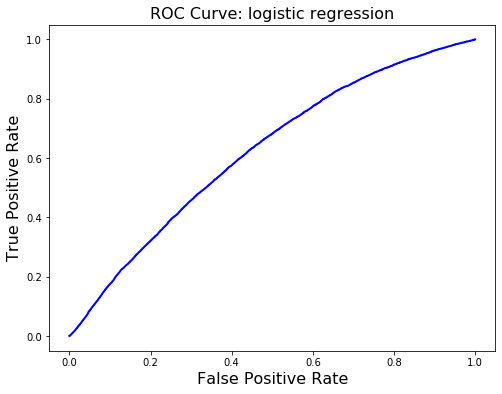

In [50]:
ROC_curve('logistic regression', y_test,lr_scores)

In [51]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(max_depth=10)
dtc_tree=tree.fit(x_train_tf,y_train)
dtc_clf_acc = cross_val_score(dtc_tree, x_train_tf, y_train, cv=3, scoring="accuracy",  n_jobs=-1)
dtc_proba = cross_val_predict(dtc_tree, x_train_tf, y_train, cv=3, method='predict_proba')
dtc_clf_scores = dtc_proba[:, 1]
dtc_tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [52]:
dtc_y_test =dtc_tree.predict(x_valid_tf)
dtc_y_test

array([1, 0, 0, ..., 1, 0, 1])

In [53]:
dtc_y_train = dtc_tree.predict(x_train_tf)
dtc_y_train

array([0, 1, 0, ..., 1, 1, 1])

In [54]:
cal_specificity(y_valid,dtc_y_test,thresh)

0.589851563322455

In [55]:
print_report(y_valid,dtc_y_test,thresh)

auc:0.617
accuracy:0.609
precision:0.476
recall:0.643
prevalence:0.367
 


(0.6165945691544106,
 0.6094666666666667,
 0.6433375749863661,
 0.47599193006052454)

In [56]:
dtc_accu_train= accuracy_score(y_train,dtc_y_train)    
dtc_accu_train

0.6381017778397691

In [57]:
dtc_accu_test= accuracy_score(y_valid,dtc_y_test)  #train 98--rs=50  
dtc_accu_test

0.6094666666666667

AUC Score (Decision tree classifier): 0.66 


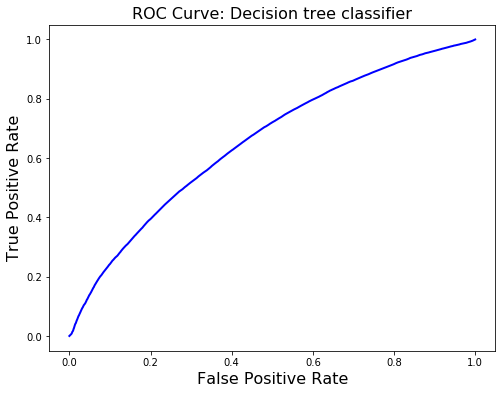

In [58]:
ROC_curve('Decision tree classifier', y_train,dtc_clf_scores)

In [59]:
from sklearn.linear_model import SGDClassifier
sgdc=SGDClassifier(loss='log',alpha=0.1)
sgdc.fit(x_train_tf,y_train)

SGDClassifier(alpha=0.1, average=False, class_weight=None, early_stopping=False,
              epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
              learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [60]:
sgdc_y_test =sgdc.predict(x_valid_tf)
sgdc_y_test

array([1, 0, 1, ..., 1, 1, 0])

In [61]:
print_report(y_valid,sgdc_y_test,thresh)

auc:0.592
accuracy:0.593
precision:0.457
recall:0.588
prevalence:0.367
 


(0.592087899339532,
 0.5930444444444445,
 0.5884990607768285,
 0.45737967410756336)

In [62]:
sgdc_proba = cross_val_predict(sgdc, x_train_tf, y_train, cv=3, method='predict_proba')
sgdc_scores = sgdc_proba[:, 1]

AUC Score (SGD classifier): 0.63 


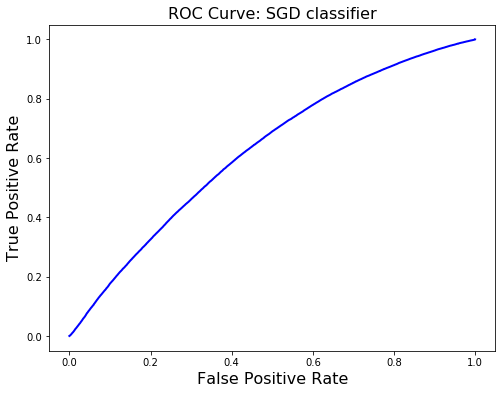

In [63]:
ROC_curve('SGD classifier', y_train,sgdc_scores)

In [64]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train_tf,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [65]:
nb_y_test =nb.predict(x_valid_tf)
nb_y_test

array([1, 0, 1, ..., 1, 1, 1])

In [66]:
print_report(y_valid,nb_y_test,thresh)

auc:0.592
accuracy:0.589
precision:0.454
recall:0.607
prevalence:0.367
 


(0.5923995086640802,
 0.5885777777777778,
 0.6067381688177907,
 0.4543721922221718)

In [67]:
nb_proba = cross_val_predict(nb, x_train_tf, y_train, cv=3, method='predict_proba')
nb_scores = nb_proba[:, 1]

AUC Score (NBclassifier): 0.62 


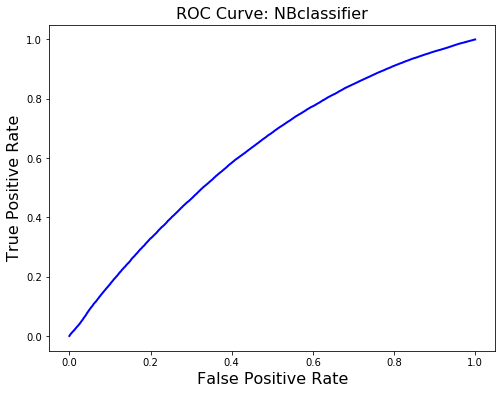

In [68]:
ROC_curve('NBclassifier', y_train,nb_scores)

In [69]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=6)
rf.fit(x_train_tf,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [70]:
rf_y_test =rf.predict(x_valid_tf)
rf_y_test

array([1, 0, 1, ..., 1, 1, 1])

In [71]:
print_report(y_valid,rf_y_test,thresh)

auc:0.614
accuracy:0.596
precision:0.465
recall:0.681
prevalence:0.367
 


(0.6137451763899129,
 0.5958444444444444,
 0.6809065018481488,
 0.46514612136766287)

In [72]:
rf_proba = cross_val_predict(rf, x_train_tf, y_train, cv=3, method='predict_proba')
rf_scores = rf_proba[:, 1]

AUC Score (RFclassifier): 0.66 


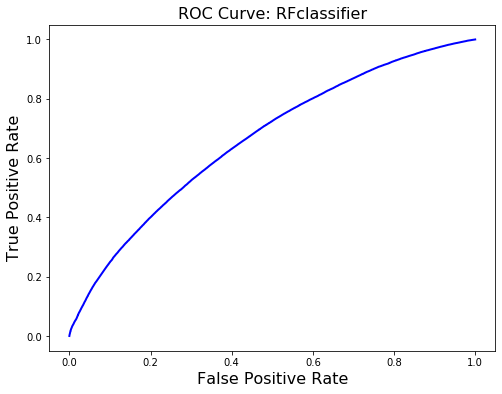

In [73]:
ROC_curve('RFclassifier', y_train,rf_scores)

from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=100,max_depth=3,learning_rate=1.0)
gbc.fit(x_train_tf,y_train)

gbc_y_test =gbc.predict(x_valid_tf)
gbc_y_test

print_report(y_valid,gbc_y_test,thresh)

gbc_proba = cross_val_predict(gbc, x_train_tf, y_train, cv=3, method='predict_proba')
gbc_scores = rf_proba[:, 1]

ROC_curve('GBCclassifier', y_train,gbc_scores)

In [ ]:
import pickle

pickle.dump(lr, open('best_classifier.pkl','wb'))

# Loading model to compare the results
model = pickle.load(open('best_classifier.pkl','rb'))

In [ ]:
y_train_preds=model.predict_prob(x_train_tf)[:,1]
y_valid_preds=model.predict_prob(x_valid_tf)[:,1]
y_test_preds=model.predict_prob(x_test_tf)[:,1]

In [75]:
df_test

,SCHEDULED_DEPARTURE,SCHEDULED_TIME,FLIGHT_NUMBER,MONTH,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,OUTPUT_LABEL
57583,1335,240.0,653,6,2,6,86,277,1
288822,820,69.0,2357,3,2,9,93,204,0
50068,2355,261.0,588,6,7,2,286,238,1
99130,2030,120.0,1337,7,3,9,286,176,1
287617,2000,114.0,338,5,5,0,85,86,1
...,...,...,...,...,...,...,...,...,...
87973,1110,56.0,416,8,5,6,277,121,1
288527,2340,211.0,132,6,7,6,108,277,0
182713,1840,80.0,1966,11,2,8,278,289,0
17205,555,159.0,6357,8,7,5,252,228,0
